In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline
# importing matplotlib inline for inline visualization/display.

In [25]:
dataset = pd.read_csv('Sample_Dataset_Electric_Motor.csv')

In [26]:
dataset.head()

,id_k,iq_k,epsilon_k,n_k,n_1k,id_k1,iq_k1
0,-81.45802,229.52930,2.240254,5,6,-105.73820,167.36170
1,-140.68210,112.42340,-1.610116,7,2,-174.89710,128.22370
2,-127.07240,171.74380,-1.971891,4,7,-92.96102,126.60810
3,-42.27880,120.14950,1.300341,2,7,-82.23310,124.33790
4,-48.02003,10.97132,-1.778834,1,4,-45.73148,11.60761


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id_k       200000 non-null  float64
 1   iq_k       200000 non-null  float64
 2   epsilon_k  200000 non-null  float64
 3   n_k        200000 non-null  int64  
 4   n_1k       200000 non-null  int64  
 5   id_k1      200000 non-null  float64
 6   iq_k1      200000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 10.7 MB


In [28]:
dataset.describe()

,id_k,iq_k,epsilon_k,n_k,n_1k,id_k1,iq_k1
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,-99.684728,93.481056,0.016805,3.782855,3.766910,-98.865480,94.769413
std,61.331968,59.347883,1.807982,2.076009,2.081997,64.453285,61.744356
min,-239.998200,0.001631,-3.141583,1.000000,1.000000,-284.010600,-9.048117
25%,-147.481375,44.108088,-1.539741,2.000000,2.000000,-148.009050,44.232233
50%,-94.212350,86.396530,0.039457,4.000000,4.000000,-94.190650,86.859640
75%,-47.874447,138.788400,1.587846,6.000000,6.000000,-47.747417,139.586550
max,-0.000568,239.969100,3.141519,7.000000,7.000000,66.177310,334.936100


In [29]:
dataset.isnull().sum()

id_k         0
iq_k         0
epsilon_k    0
n_k          0
n_1k         0
id_k1        0
iq_k1        0
dtype: int64

In [30]:
dataset.corr()

,id_k,iq_k,epsilon_k,n_k,n_1k,id_k1,iq_k1
id_k,1.000000,0.252736,0.002358,0.064648,0.043860,0.901744,0.250763
iq_k,0.252736,1.000000,-0.001427,-0.007236,-0.006409,0.248132,0.945930
epsilon_k,0.002358,-0.001427,1.000000,-0.067619,-0.064481,0.002274,-0.001104
n_k,0.064648,-0.007236,-0.067619,1.000000,-0.018938,0.020741,0.010015
n_1k,0.043860,-0.006409,-0.064481,-0.018938,1.000000,0.034460,-0.006236
id_k1,0.901744,0.248132,0.002274,0.020741,0.034460,1.000000,0.259775
iq_k1,0.250763,0.945930,-0.001104,0.010015,-0.006236,0.259775,1.000000


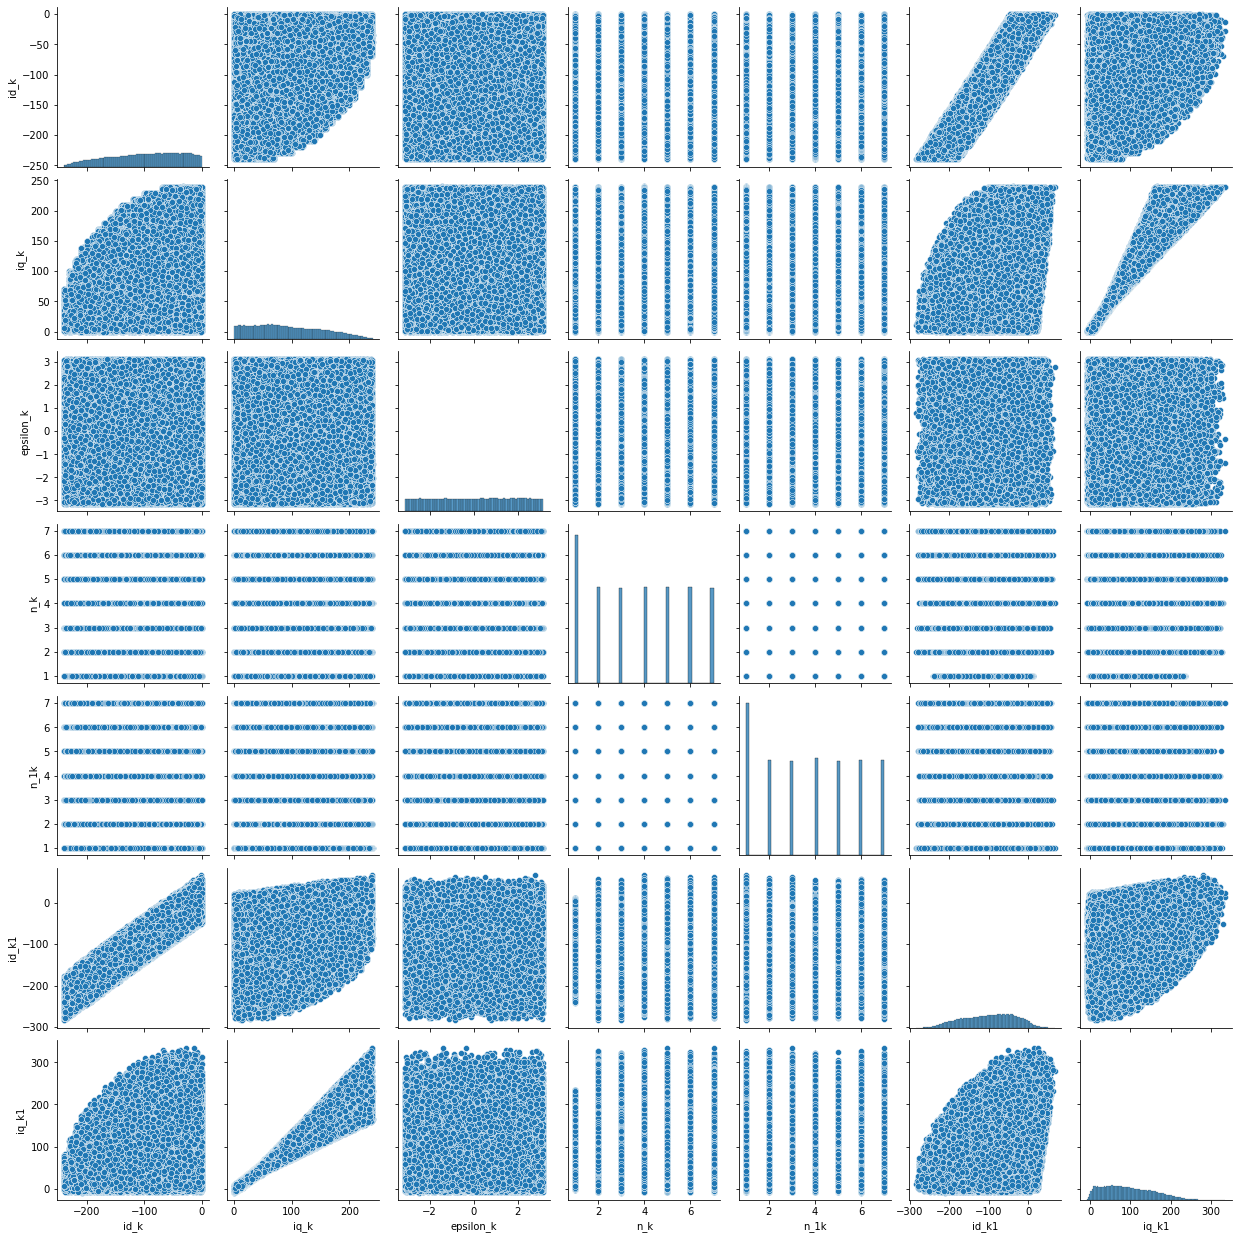

In [34]:
sns.pairplot(dataset)

1. Prepare independent and dependent features.
2. Train-Test split.
3. Standardizing the dataset. (Since all the features are recorded in different units, and also we need to do the gradient descent in linear regression.) (We standardize only for the training set.)

In [35]:
dataset.head()

,id_k,iq_k,epsilon_k,n_k,n_1k,id_k1,iq_k1
0,-81.45802,229.52930,2.240254,5,6,-105.73820,167.36170
1,-140.68210,112.42340,-1.610116,7,2,-174.89710,128.22370
2,-127.07240,171.74380,-1.971891,4,7,-92.96102,126.60810
3,-42.27880,120.14950,1.300341,2,7,-82.23310,124.33790
4,-48.02003,10.97132,-1.778834,1,4,-45.73148,11.60761


In [36]:
y1 = dataset.iloc[:,5]
y2 = dataset.iloc[:,6]
x1 = dataset.iloc[:,:5]
x2 = dataset.iloc[:,:5]

In [37]:
y1.head()

0   -105.73820
1   -174.89710
2    -92.96102
3    -82.23310
4    -45.73148
Name: id_k1, dtype: float64

In [38]:
y2.head()

0    167.36170
1    128.22370
2    126.60810
3    124.33790
4     11.60761
Name: iq_k1, dtype: float64

In [39]:
x1.head()

,id_k,iq_k,epsilon_k,n_k,n_1k
0,-81.45802,229.52930,2.240254,5,6
1,-140.68210,112.42340,-1.610116,7,2
2,-127.07240,171.74380,-1.971891,4,7
3,-42.27880,120.14950,1.300341,2,7
4,-48.02003,10.97132,-1.778834,1,4


In [40]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.3, random_state = 42)

In [41]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.3, random_state = 42)

In [42]:
# Standardizing:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

In [44]:
import pickle
pickle.dump(scaler, open('scaling.pkl','wb'))

### Model Training:

In [46]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model2 = LinearRegression()

In [47]:
model1.fit(x1_train, y1_train)
model2.fit(x2_train, y2_train)

LinearRegression()

In [49]:
predict_1 = model1.predict(x1_test)
predict_2 = model2.predict(x2_test)

print(predict_1, '\n')
print(predict_2)

[ -11.79476723 -121.44044736  -51.49076893 ...  -18.4798288  -142.93748425
  -99.32286613] 

[200.91219351  37.00089361 153.08768307 ... 130.63042583 137.9049786
 100.20179724]


## Testing the prediction:

Text(0, 0.5, 'Predicted Value')

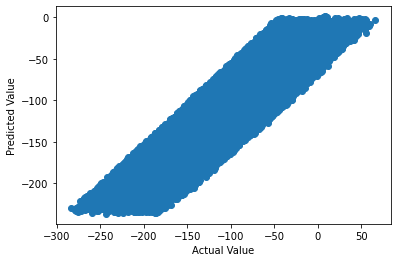

In [50]:
plt.scatter(y1_test, predict_1)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Text(0, 0.5, 'Predicted Value')

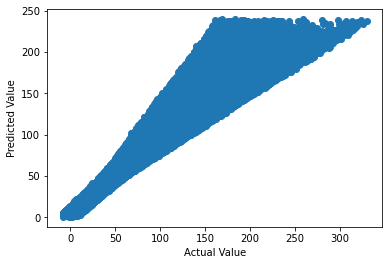

In [51]:
plt.scatter(y2_test, predict_2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [52]:
residuals_1 = y1_test - predict_1
residuals_2 = y2_test - predict_2

C:\Users\Anurag Pacholi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='id_k1', ylabel='Density'>

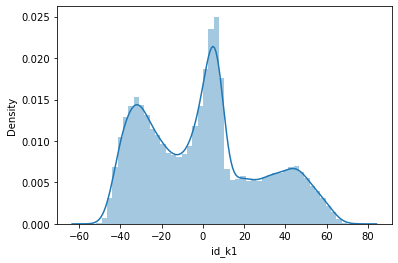

In [55]:
sns.distplot(residuals_1, kde = True, hist=True)

C:\Users\Anurag Pacholi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='iq_k1', ylabel='Density'>

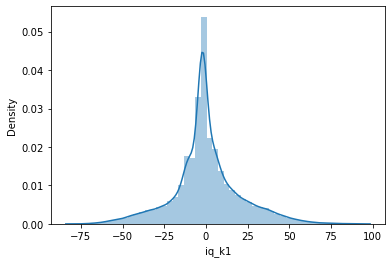

In [56]:
sns.distplot(residuals_2, kde = True, hist=True)

## Performance:

In [58]:
from sklearn.metrics import r2_score
score1 = r2_score(y1_test, predict_1)
print(score1)
score2 = r2_score(y2_test, predict_2)
print(score2)

0.815123644019801
0.8940682801475612


**Observation**: Prediction for y1 is 81.5% Accurate and Prediction for y2 is 89.4% Accurate.

### Lets predict values for some input:

In [119]:
dataset.head()

,id_k,iq_k,epsilon_k,n_k,n_1k,id_k1,iq_k1
0,-81.45802,229.52930,2.240254,5,6,-105.73820,167.36170
1,-140.68210,112.42340,-1.610116,7,2,-174.89710,128.22370
2,-127.07240,171.74380,-1.971891,4,7,-92.96102,126.60810
3,-42.27880,120.14950,1.300341,2,7,-82.23310,124.33790
4,-48.02003,10.97132,-1.778834,1,4,-45.73148,11.60761


In [134]:
model1.predict(scaler.transform([[-48.02003, 10.97132, -1.778834, 1, 4]]))

C:\Users\Anurag Pacholi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-48.41602924])

In [135]:
model2.predict(scaler.transform([[-48.02003, 10.97132, -1.778834, 1, 4]]))

C:\Users\Anurag Pacholi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([12.95195321])

## As we can see the predictions are very close!

In [136]:
pickle.dump(model1, open('model1.pkl','wb'))
pickle.dump(model2, open('model2.pkl','wb'))